# Admission Type Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Loading the dataset
df = pd.read_csv('datasets/healthcare_dataset.csv')
# Cleaning column names (remove spaces, special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [56]:
admission_type = df.groupby('admission_type').size()
admission_type

admission_type
Elective     18655
Emergency    18269
Urgent       18576
dtype: int64

In [71]:
df['Date of Admission'] = pd.to_datetime(df['date_of_admission'])
df['Year'] = df['Date of Admission'].dt.year
df['Age Group'] = pd.cut(df['age'], bins=[0,18,35,50,65,100], labels=['0-18','19-35','36-50','51-65','65+'])


# Setting the style
plt.style.use('ggplot')
sns.set_palette("pastel")

## 1. Admission Type and Billing Amount

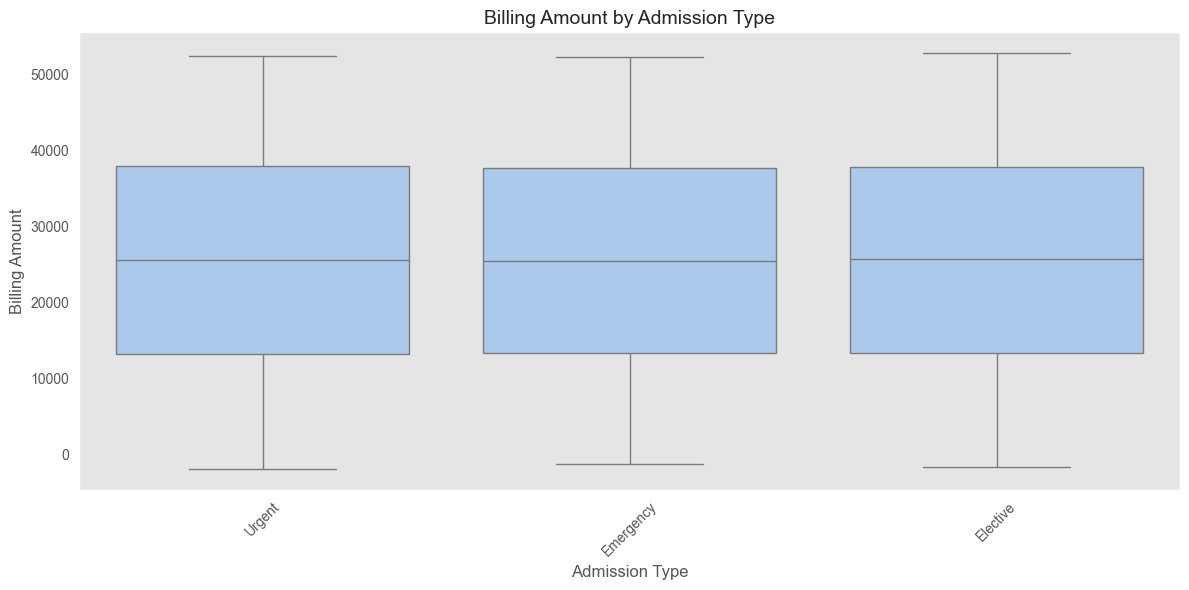

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='admission_type', y='billing_amount', data=df)
plt.title('Billing Amount by Admission Type', fontsize=14)
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Billing Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

## Admission Type Heatmap by Age and Gender

The heatmap visualizes the distribution of admission types (Elective, Emergency, Urgent) across different age groups and genders. The data is normalized by the index, allowing for a percentage-based comparison within each age group and gender combination. This provides insights into how admission types vary across demographics.

Key observations:
- The distribution of admission types is relatively balanced across age groups and genders.
- Slight variations can be observed, such as a higher proportion of "Elective" admissions in certain age-gender combinations.

The heatmap uses a blue color palette (`Blues`) to represent the percentage distribution, with annotations for clarity.

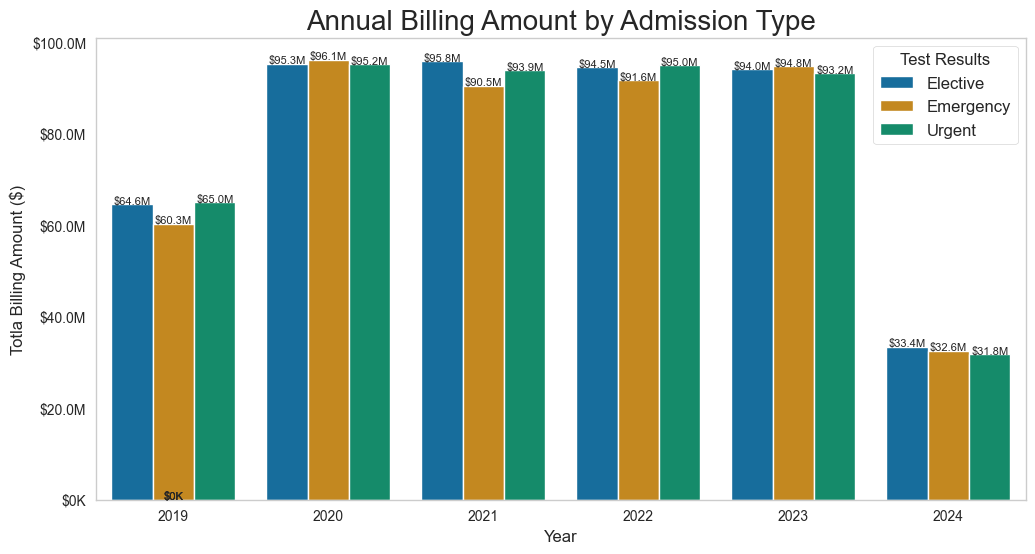

In [72]:
from matplotlib.ticker import FuncFormatter
yearly_conditions = df.groupby(['Year', 'admission_type']).size().reset_index(name='Count')

# Grouping by gender and year
annual_billing = df.groupby(['admission_type', 'Year'])['billing_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.set_palette('colorblind')

ax = sns.barplot(data=annual_billing,
                 x="Year",
                 y="billing_amount",
                 hue='admission_type',
                 edgecolor='white',
                 width=0.8,
                 linewidth=1)
plt.title('Annual Billing Amount by Admission Type', fontsize=20)
plt.legend(title='Admission Type', fontsize=11, title_fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Totla Billing Amount ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

# Formating y-axis as currency
def currency_formatter(x, pos):
    return f"${x/1000000:,.1f}M" if x >= 1000000 else f"${x/1000:,.0f}K"
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Adjusting the legend
plt.legend(title='Test Results', fontsize=12, title_fontsize=12)
# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10000,
            f'${height/1000000:.1f}M' if height >= 1000000 else f'${height/1000:,.0f}K',
            ha="center", fontsize=8)

plt.show()

## 2. Admission Type Trend per Year

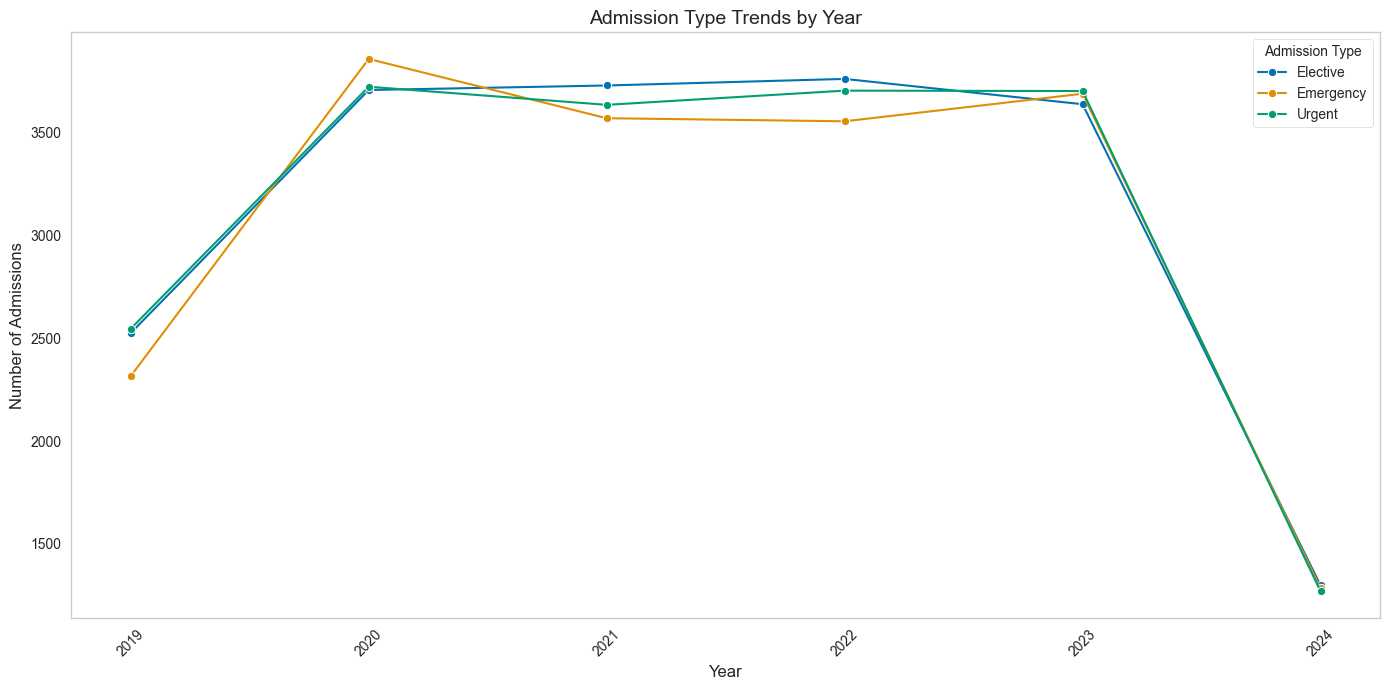

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_conditions, x='Year', y='Count', hue='admission_type', marker='o')
plt.title('Admission Type Trends by Year', fontsize=14)
plt.xlabel('Year', fontsize=12) 
plt.ylabel('Number of Admissions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Admission Type')
plt.tight_layout()
plt.grid(False)
plt.show()

## 3. Admission Type and Medication

<Figure size 1400x700 with 0 Axes>

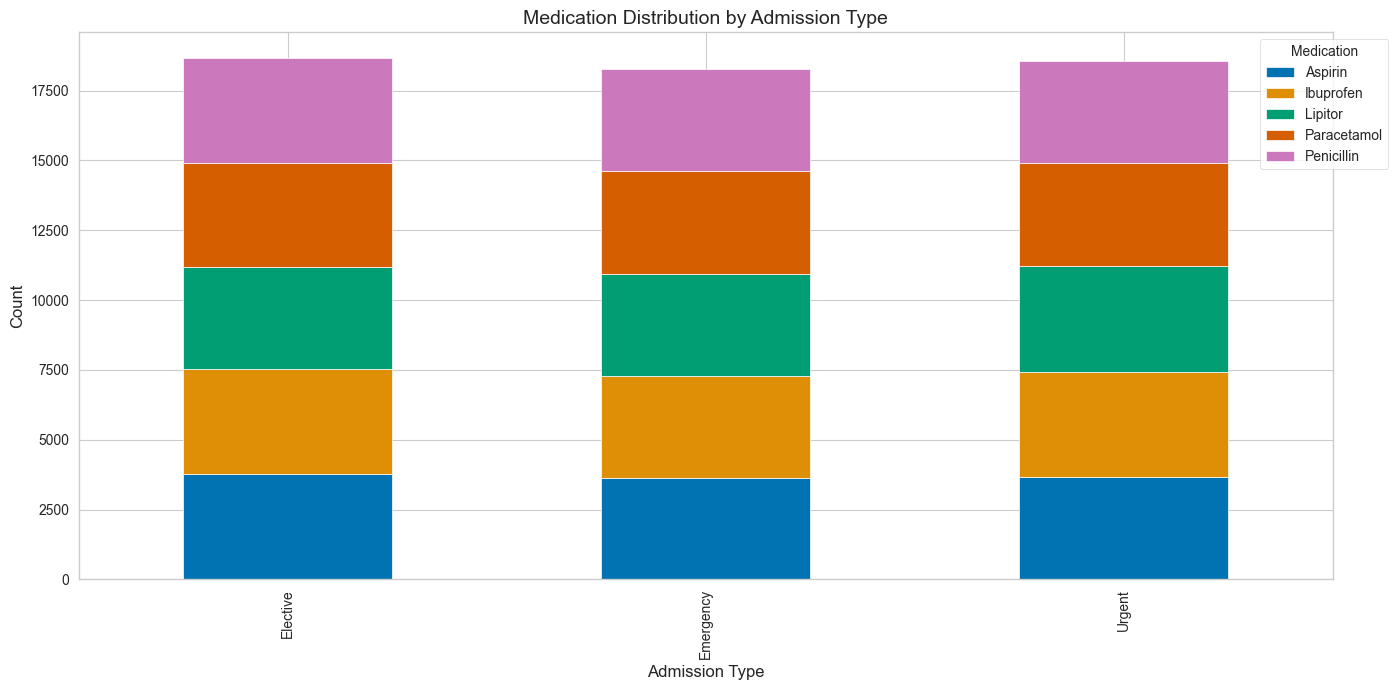

In [ ]:
plt.figure(figsize=(14,7))
medication_counts = df.groupby(['admission_type', 'medication']).size().unstack()
medication_counts.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Medication Distribution by Admission Type', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Admission Type')
plt.legend(title='Medication', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## 4. Admission Type and Medication by Gender

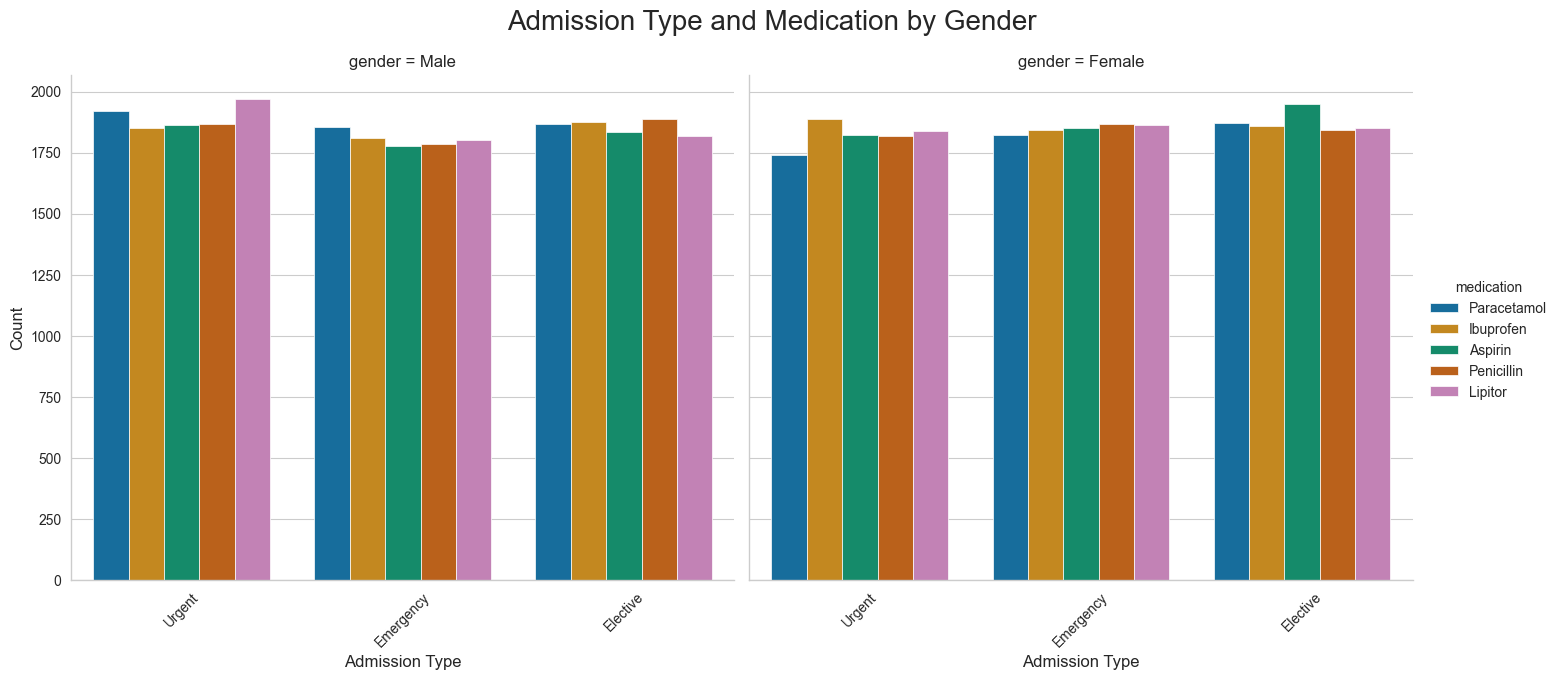

In [ ]:
g = sns.catplot(x='admission_type', hue='medication', col='gender',
                data=df, kind='count', height=6, aspect=1.2)
g.fig.suptitle('Admission Type and Medication by Gender',fontsize=20, y=1.05)
g.set_xticklabels(rotation=45)
g.set_axis_labels('Admission Type', 'Count')
# plt.tight_layout()
plt.show()

## 5. Admission Type by Age Group

<Figure size 1400x700 with 0 Axes>

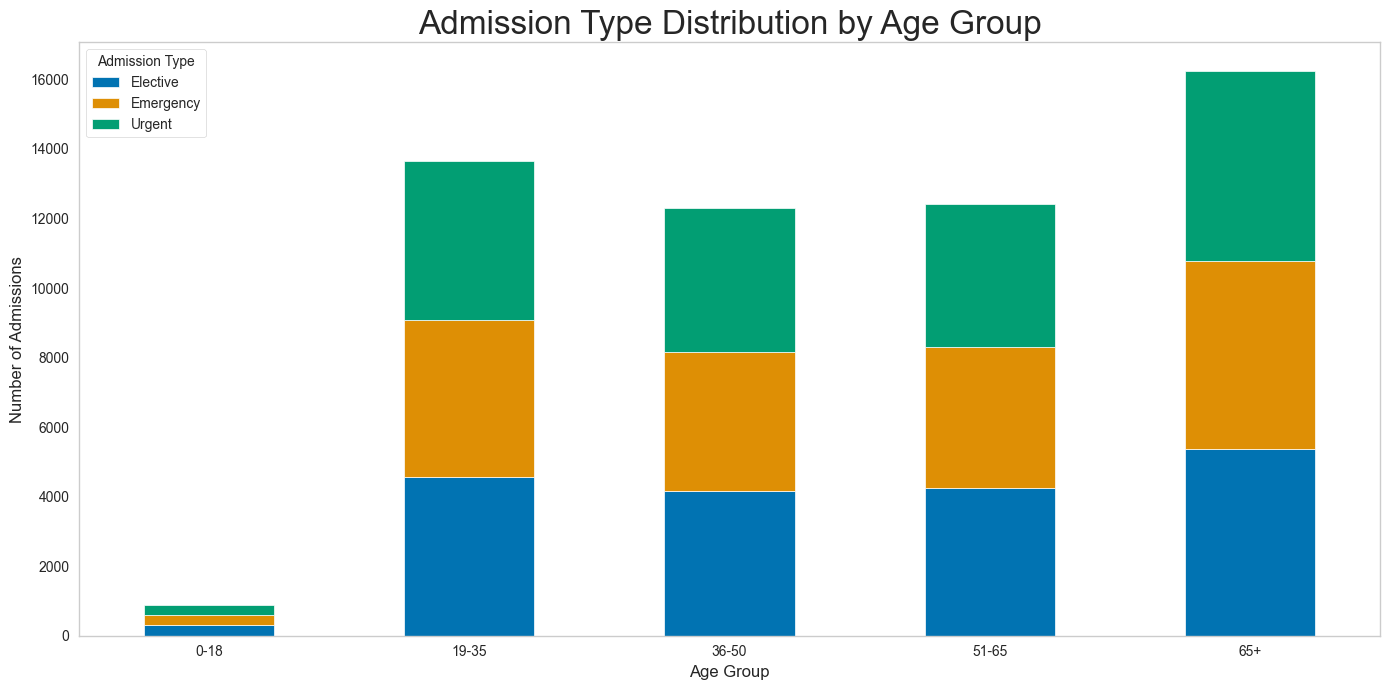

In [ ]:
plt.figure(figsize=(14,7))
age_admissions = df.groupby(['Age Group', 'admission_type'], observed=False).size().unstack()
age_admissions.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Admission Type Distribution by Age Group', fontsize=24)
plt.ylabel('Number of Admissions')
plt.xlabel('Age Group')
plt.legend(title='Admission Type')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

## 6. Admission Type and Test Results

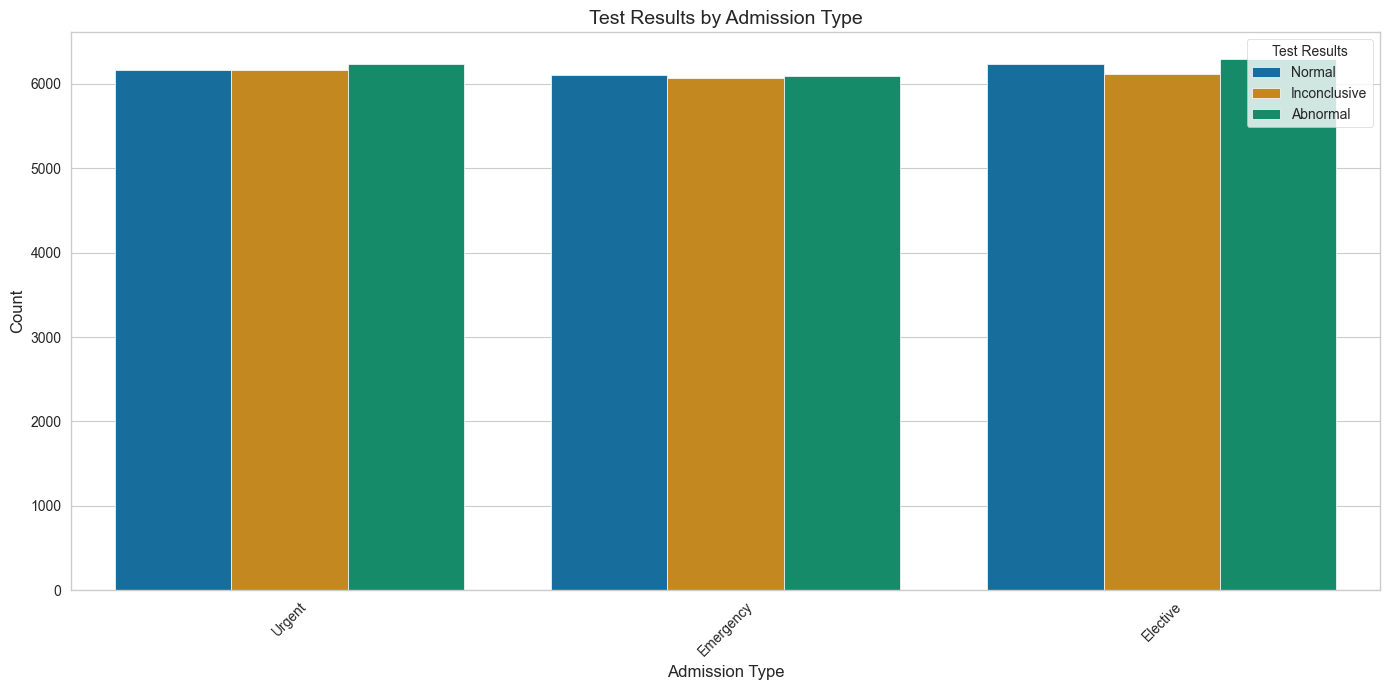

In [69]:
plt.figure(figsize=(14,7))
sns.countplot(x='admission_type', hue='test_results', data=df)
plt.title('Test Results by Admission Type', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Admission Type')
plt.legend(title='Test Results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Advanced: Admission Type Heatmap by Age and Gender

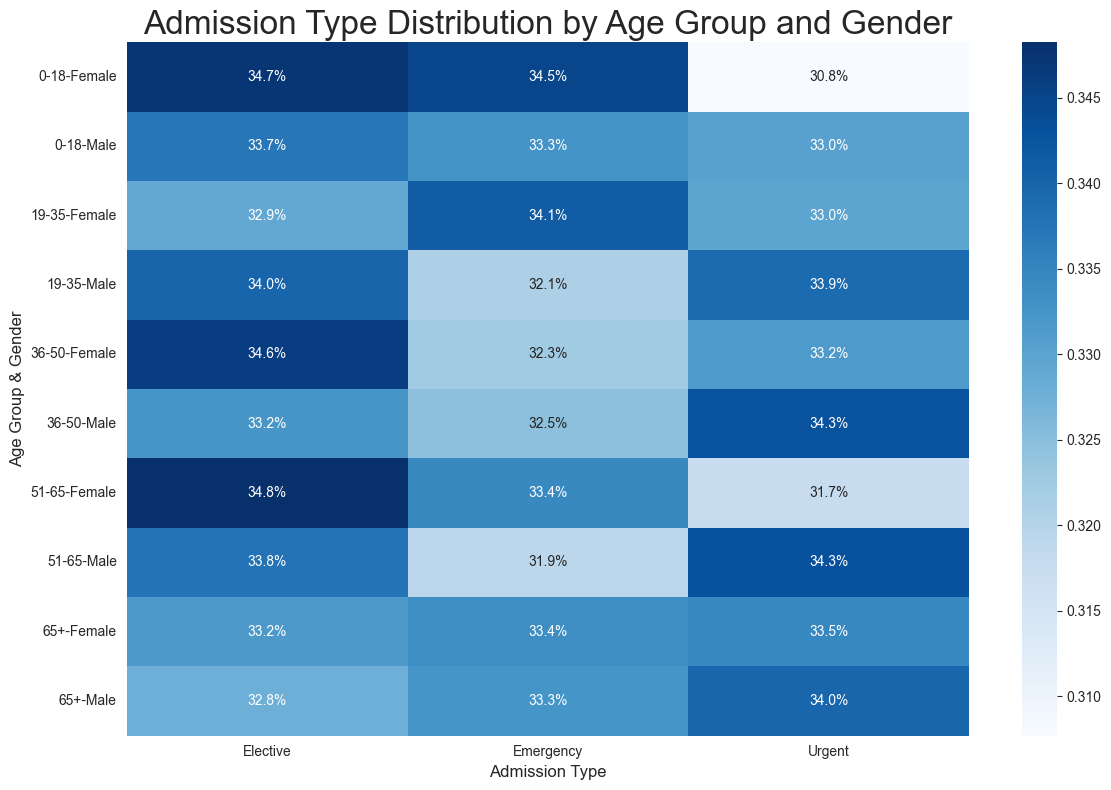

In [ ]:
plt.figure(figsize=(12,8))
admission_cross = pd.crosstab(
    index=[df['Age Group'], df['gender']],
    columns=df['admission_type'],
    normalize='index'
)
sns.heatmap(admission_cross, annot=True, fmt='.1%', cmap='Blues')
plt.title('Admission Type Distribution by Age Group and Gender', fontsize=24)
plt.ylabel('Age Group & Gender')
plt.xlabel('Admission Type')
plt.tight_layout()
plt.show()